# Ödev 2: K-Means ve California Housing Dataset

Bu ödevde California housing veri setini, Kmeans algoritmasını kullanarak ekonomik segmentlere ayırmanız gerekmektedir. Alt görevler:

1. Verisetini kullanarak farklı cluster sayılarında KMeans clusterları eğit (2-8 arası iyi bir seçim)
2. Her bir KMeans için silhouette skorunu çıkar ve görselleştir. Eğer istersen Silhouette grafiğini de çıkarabilirsin.
3. Farklı cluster sayılarının, segmentasyona etkilerini incele. Örneğin cluster sayısı 2 olduğunda haritayı 2'ye bölüp yukarıdakiler ve aşağıdakiler şeklinde ayırıyor, 3 olduğunda ise yukarıdakiler, aşağıdakiler ve zenginler gibi ayırıyor. Bol bol keşfet!

In [6]:
from sklearn.datasets import fetch_california_housing

dataset  = fetch_california_housing(as_frame = True)

In [7]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


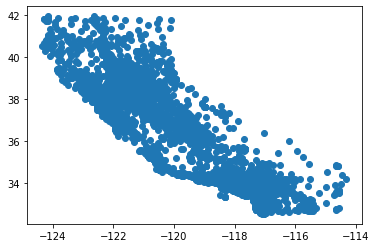

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X['Longitude'],X['Latitude'])

In [9]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]

In [10]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [11]:
from sklearn.cluster import KMeans

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [13]:
def plot_clusters(X, y, kmeans, title):
    plt.figure(figsize=(10,10))
    plt.scatter(X['Longitude'],X['Latitude'], c=y, cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.show()

In [14]:
kmeans = KMeans(n_clusters=2)

In [15]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
y_pred = kmeans.predict(X)

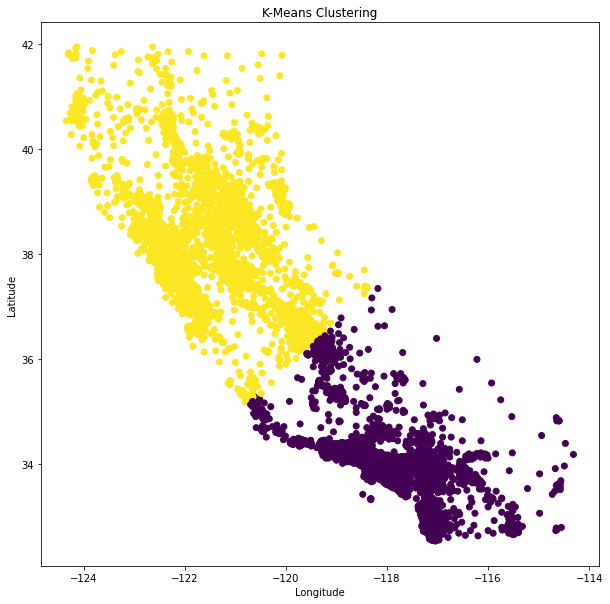

In [17]:
plot_clusters(X, y_pred, kmeans, "K-Means Clustering")

In [18]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [20]:
y_pred = kmeans.predict(X)

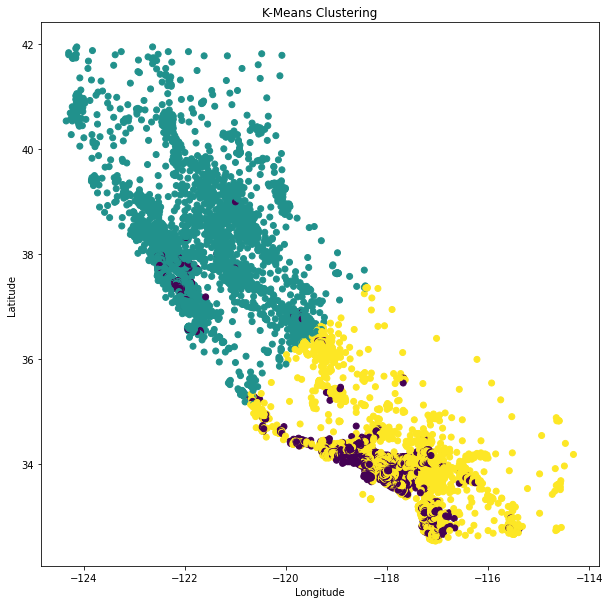

In [22]:
plot_clusters(X, y_pred, kmeans, "K-Means Clustering")

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
def silhouette_plot(X, y, kmeans, title):
    """:cvar
        X: Dataframe
        y: Series
        kmeans: KMeans
        title: String
        Silhouette score plot

    """
    silhouette_avg = silhouette_score(X, y)
    plt.figure(figsize=(10,10))
    plt.scatter(X['Longitude'],X['Latitude'], c=y, cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.show()
    print("Silhouette score: {:.2f}".format(silhouette_avg))

In [25]:
kmeans = KMeans(n_clusters=2)

In [26]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [27]:
y_pred = kmeans.predict(X)

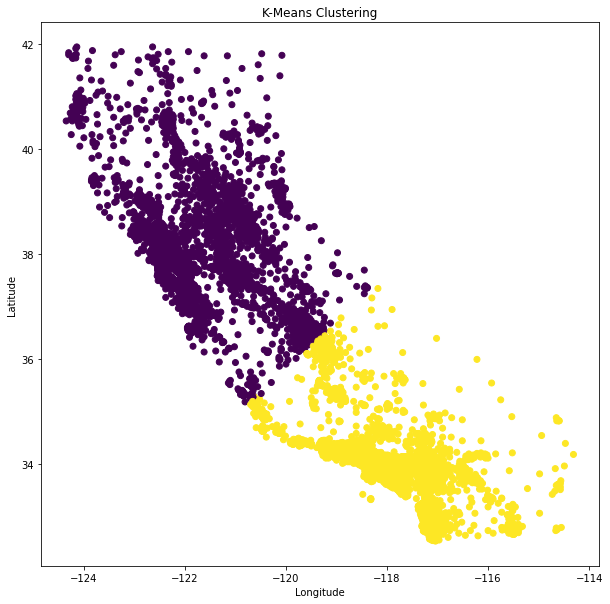

Silhouette score: 0.57


In [28]:
silhouette_plot(X, y_pred, kmeans, "K-Means Clustering")

In [29]:
kmeans = KMeans(n_clusters=3)

In [30]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [31]:
y_pred = kmeans.predict(X)

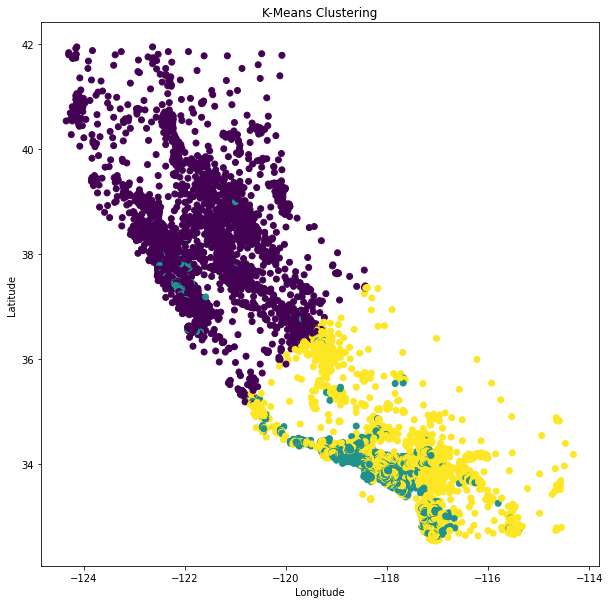

Silhouette score: 0.50


In [32]:
silhouette_plot(X, y_pred, kmeans, "K-Means Clustering")